In [1]:
# Project: Decision Tree Classifier
# Dataset: Bank Marketing Dataset
# Author: Rahul Majumder

In [2]:
# Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Step 2: Load Dataset

In [5]:
url = "https://raw.githubusercontent.com/rahul-majumder/Group-A/refs/heads/main/Bank_marketing_dataset.csv"
df = pd.read_csv(url)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [8]:
df.shape

(41188, 21)

In [9]:
# Step 3: Data Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# Step 4: Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="cool")

In [15]:
# Distribution of Target Variable

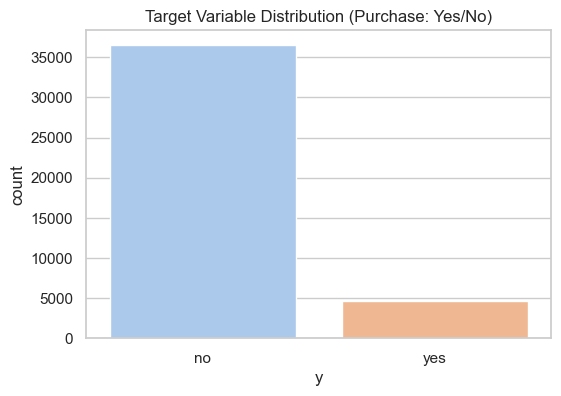

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, hue='y', legend=False, palette='pastel')
plt.title("Target Variable Distribution (Purchase: Yes/No)")
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Overall Purchase Distribution

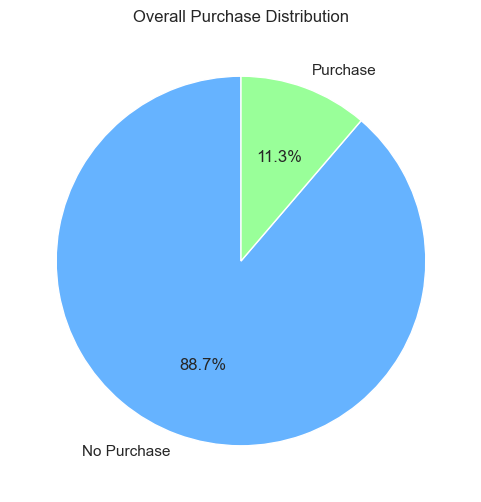

In [19]:
plt.figure(figsize=(6,6))
df['y'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#99ff99'], 
    labels=['No Purchase', 'Purchase'])
plt.title("Overall Purchase Distribution")
plt.ylabel('')
plt.show()

In [20]:
# Age Distribution

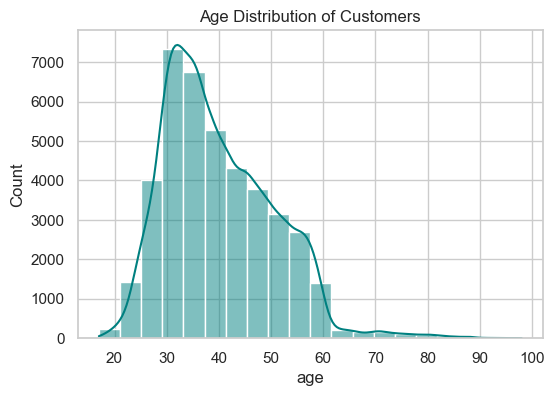

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Customers")
plt.show()

In [22]:
# Marital Status Distribution

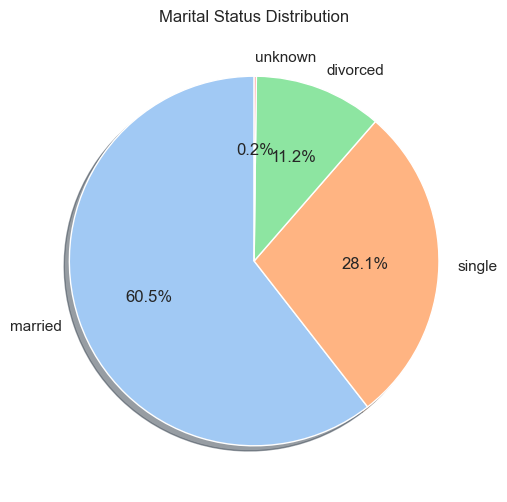

In [23]:
plt.figure(figsize=(6,6))
df['marital'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'),
    shadow=True)
plt.title("Marital Status Distribution")
plt.ylabel('')
plt.show()

In [24]:
# Education vs Purchase Decision

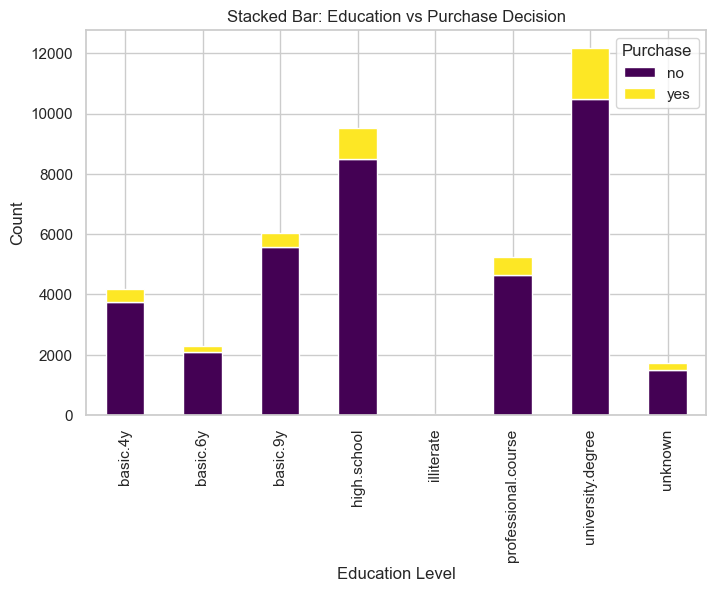

In [25]:
edu_counts = df.groupby(['education','y']).size().unstack()
edu_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title("Stacked Bar: Education vs Purchase Decision")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title='Purchase', loc='upper right')
plt.show()

In [26]:
# Job Type vs Purchase Decision

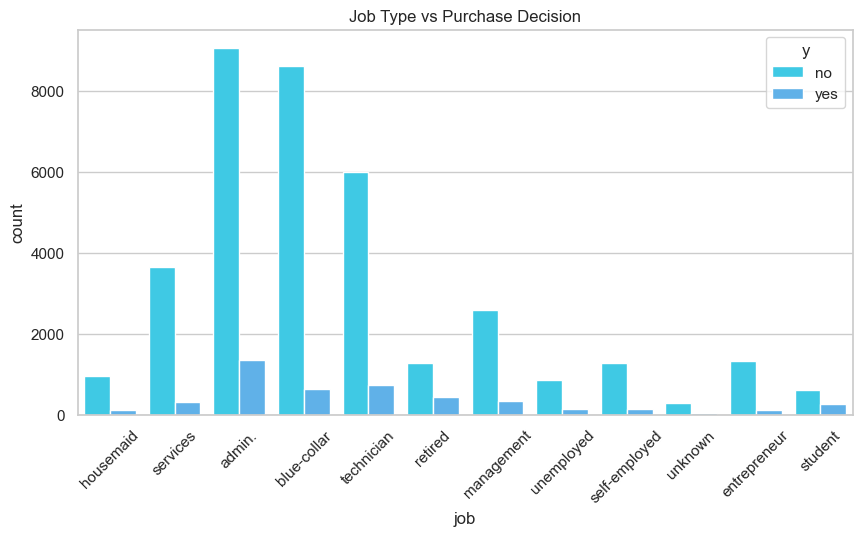

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.title("Job Type vs Purchase Decision")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Education Level vs Purchase Rate

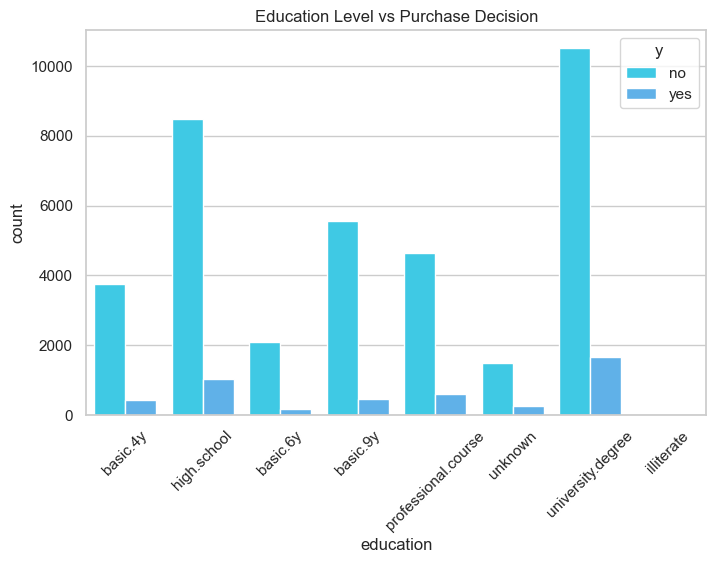

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='education', hue='y', data=df)
plt.title("Education Level vs Purchase Decision")
plt.xticks(rotation=45)
plt.show()

In [30]:
# Correlation Heatmap (for numeric features)

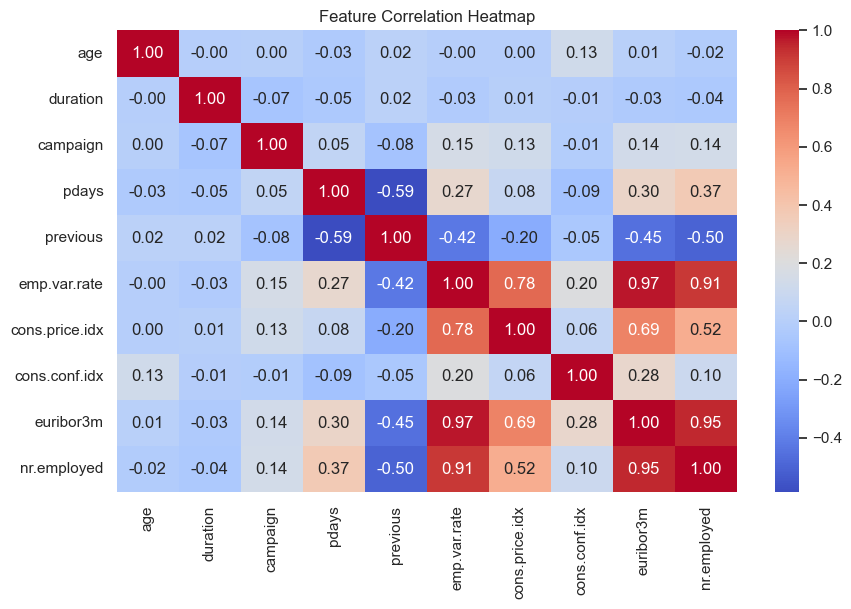

In [31]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
# Contact Type vs Purchase Rate

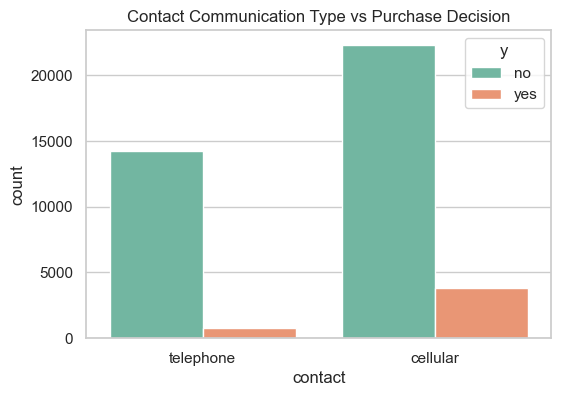

In [33]:
if 'contact' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='contact', hue='y', data=df, palette='Set2')
    plt.title("Contact Communication Type vs Purchase Decision")
    plt.show()

In [34]:
# Step 5: Data Preprocessing

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [37]:
# Split Dataset into Features & Target

In [38]:
X = df.drop('y', axis=1)   
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Model Training

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [41]:
# Model Evaluation

Accuracy: 0.9135712551590192

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



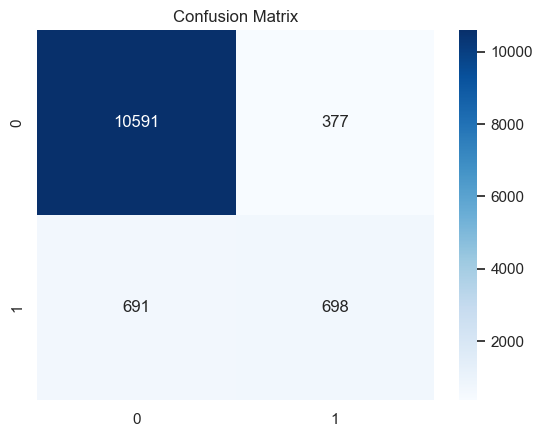

In [42]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [43]:
# Step 6: Visualize the Decision Tree

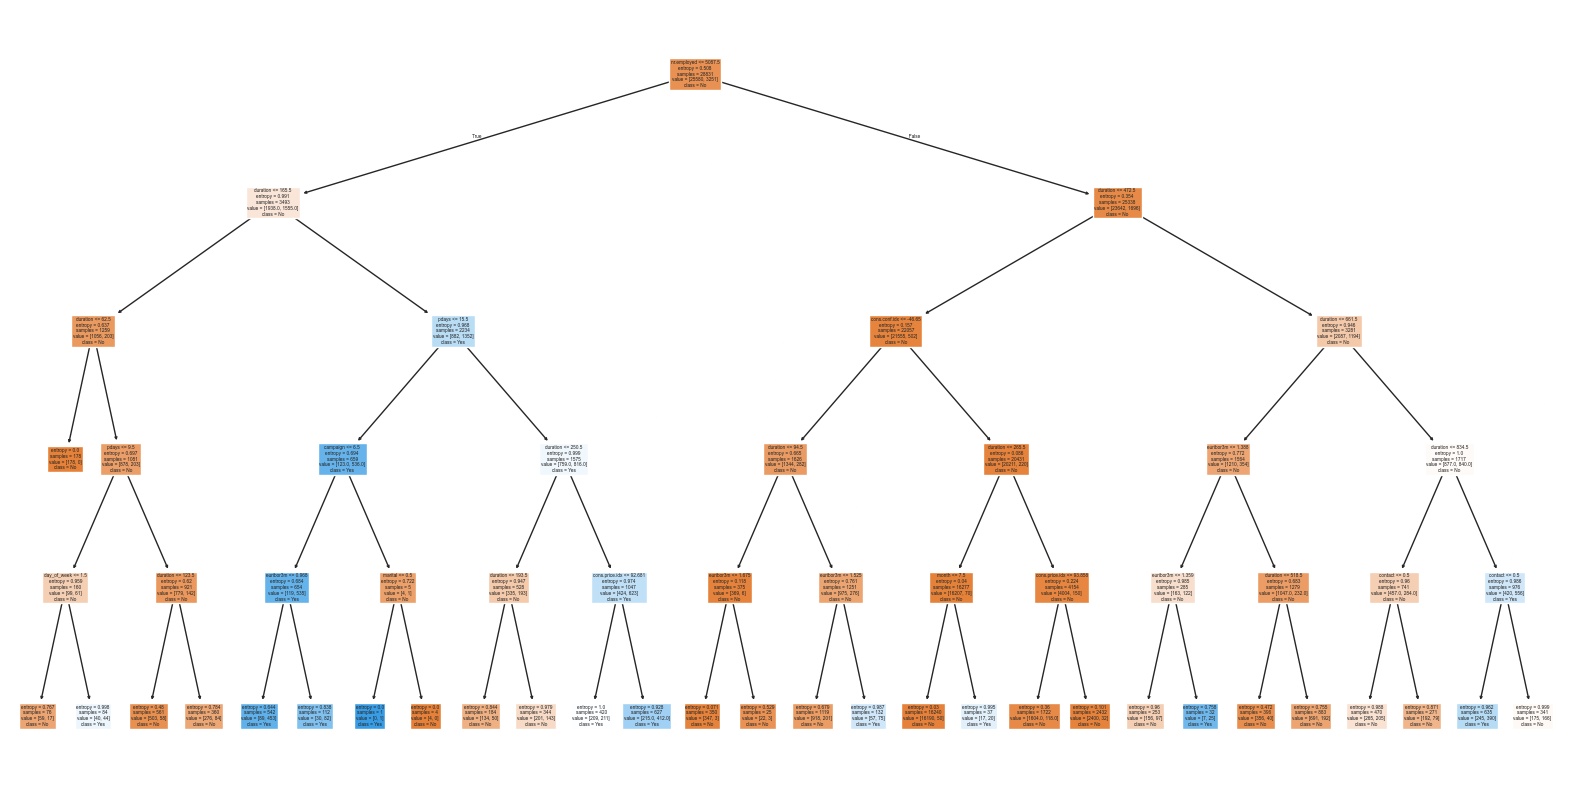

In [44]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

In [45]:
# Step 7: Conclusion

In [46]:
print("✅ The Decision Tree model predicts customer purchase behavior with accuracy of:",
      round(accuracy_score(y_test, y_pred)*100, 2), "%")

✅ The Decision Tree model predicts customer purchase behavior with accuracy of: 91.36 %
